In [5]:
import cv2
video_path = r"C:\Users\91924\Desktop\MY WORKS\sem 7\image and video analytics\Walt Disney Animation Studios-Steamboat Willie Intro.mp4"
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Get video properties
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = cap.get(cv2.CAP_PROP_FPS)
duration = frame_count / fps
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
resolution = (width, height)
video_format = cap.get(cv2.CAP_PROP_FORMAT)
fourcc = cap.get(cv2.CAP_PROP_FOURCC)
bitrate = cap.get(cv2.CAP_PROP_BITRATE)
cap.release()

# Convert the FourCC code to a readable format
fourcc_str = "".join([chr((int(fourcc) >> 8 * i) & 0xFF) for i in range(4)])

print(f"Video Path: {video_path}")
print(f"Number of Frames: {frame_count}")
print(f"Frame Rate (FPS): {fps:.2f}")
print(f"Duration: {duration:.2f} seconds")
print(f"Resolution: {resolution[0]}x{resolution[1]}")
print(f"Video Format: {video_format}")
print(f"FourCC Code: {fourcc_str}")
print(f"Bitrate: {bitrate} ")



Video Path: C:\Users\91924\Desktop\MY WORKS\sem 7\image and video analytics\Walt Disney Animation Studios-Steamboat Willie Intro.mp4
Number of Frames: 461
Frame Rate (FPS): 30.00
Duration: 15.37 seconds
Resolution: 640x270
Video Format: 0.0
FourCC Code: h264
Bitrate: 507.0 


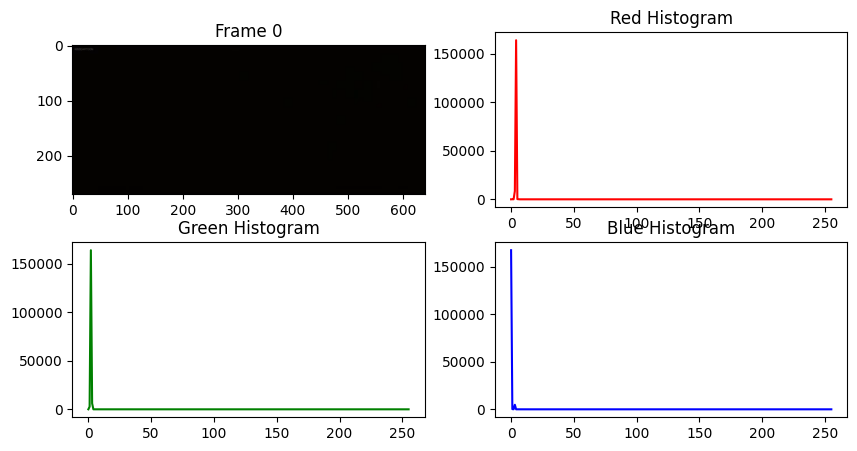

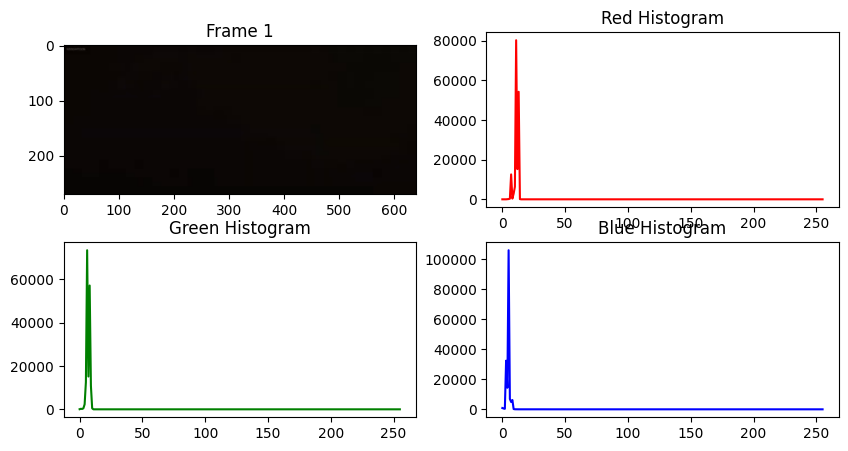

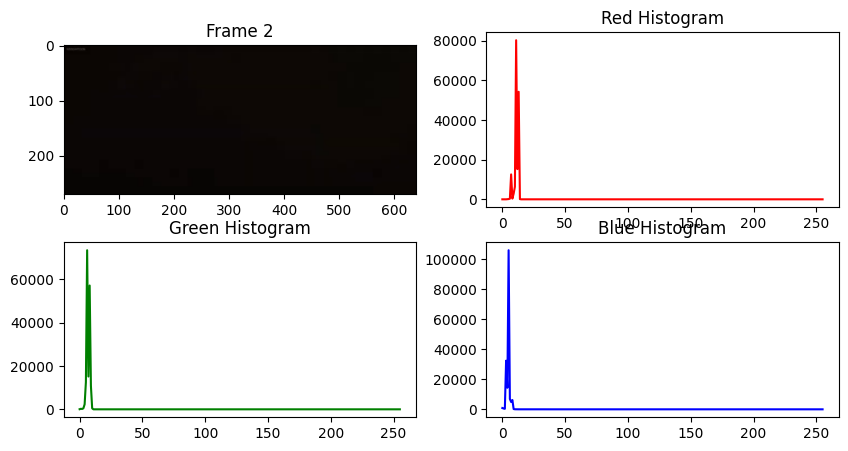

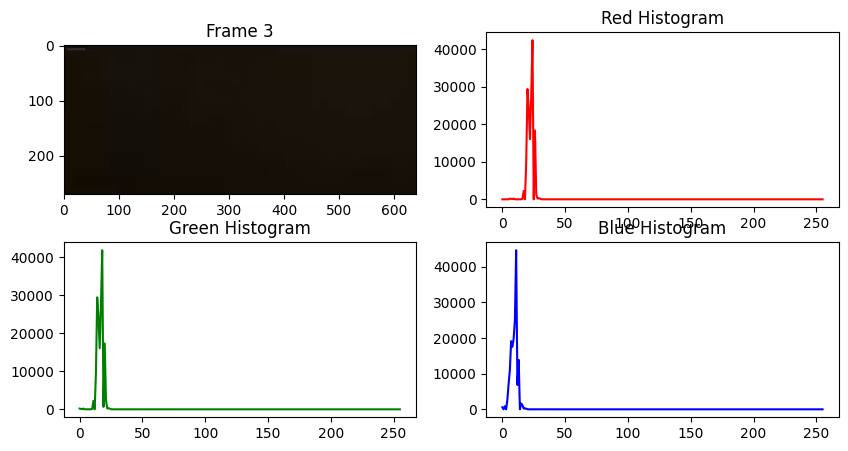

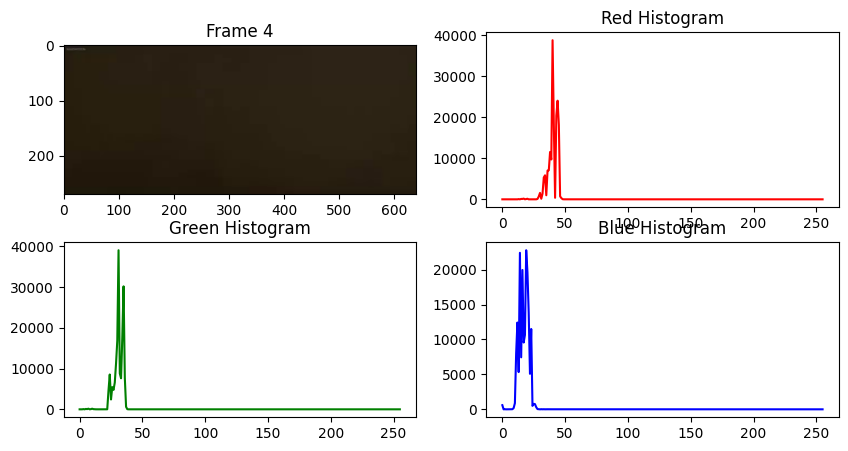

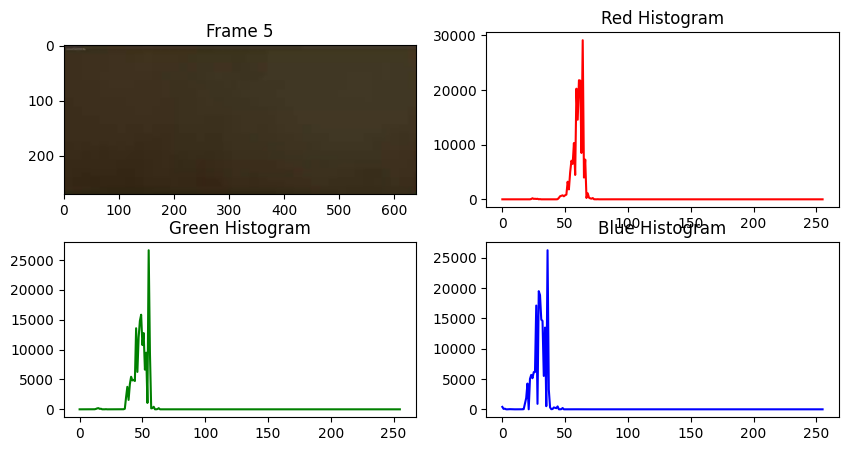

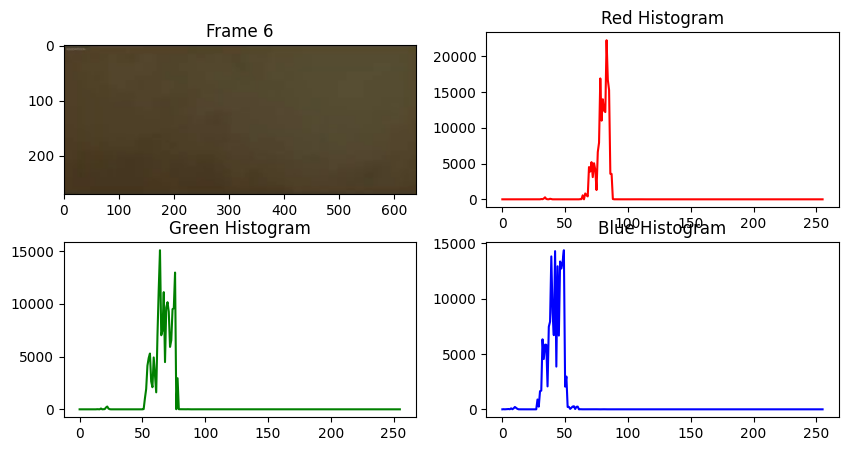

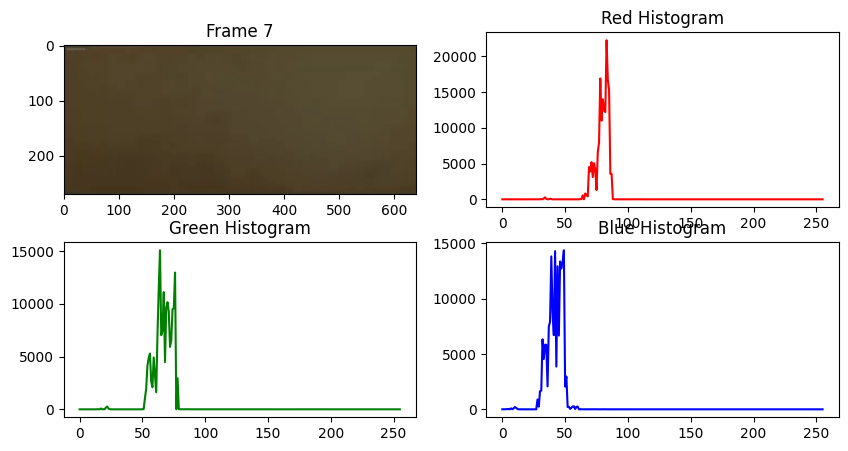

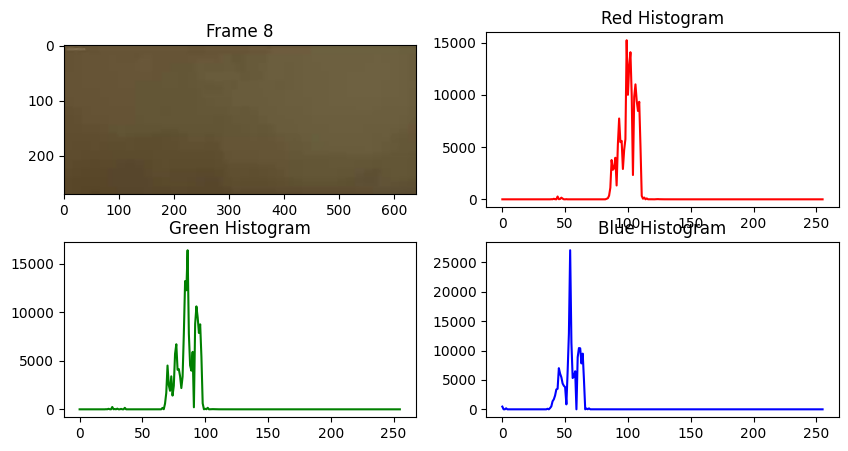

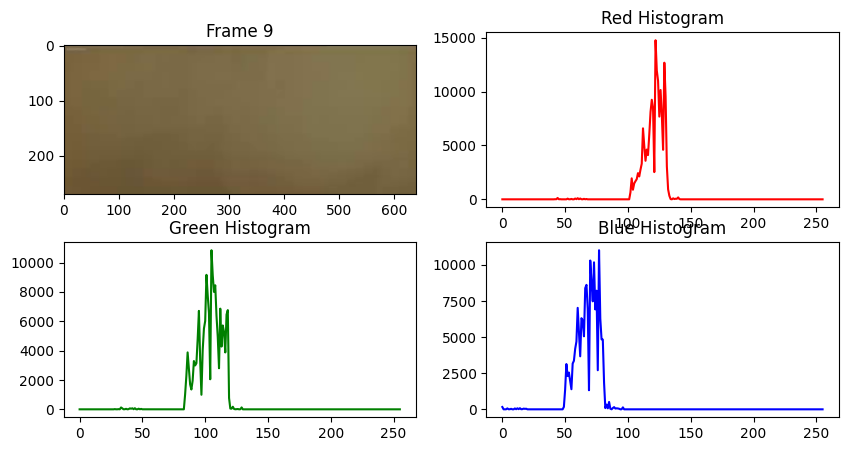

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

video_path = r"C:\Users\91924\Desktop\MY WORKS\sem 7\image and video analytics\Walt Disney Animation Studios-Steamboat Willie Intro.mp4"
cap = cv2.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

frame_number = 0

while True:
    # Read the next frame
    ret, frame = cap.read()

    if not ret:
        break

    # Convert frame from BGR to RGB (for displaying in matplotlib)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Calculate the color histogram for the frame
    hist_r = cv2.calcHist([frame_rgb], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([frame_rgb], [1], None, [256], [0, 256])
    hist_b = cv2.calcHist([frame_rgb], [2], None, [256], [0, 256])

    # Plot the histograms
    plt.figure(figsize=(10, 5))
    plt.subplot(221)
    plt.imshow(frame_rgb)
    plt.title(f'Frame {frame_number}')

    plt.subplot(222)
    plt.plot(hist_r, color='red')
    plt.title('Red Histogram')

    plt.subplot(223)
    plt.plot(hist_g, color='green')
    plt.title('Green Histogram')

    plt.subplot(224)
    plt.plot(hist_b, color='blue')
    plt.title('Blue Histogram')

    plt.show()

    frame_number += 1

    # Exit after displaying the histogram for 10 frames
    if frame_number > 9:
        break

# Release the video capture object
cap.release()


In [1]:
import cv2
import numpy as np
video_path = "C:/Users/91924/Desktop/MY WORKS/sem 7/image and video analytics/Walt Disney Animation Studios-Steamboat Willie Intro.mp4"

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Read the first frame
ret, prev_frame = cap.read()

if not ret:
    print("Error: Could not read the video frame.")
    exit()

# Convert the first frame to grayscale
prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

# Initialize a kernel for morphological operations (optional)
kernel = np.ones((5, 5), np.uint8)

while True:
    # Read the next frame
    ret, frame = cap.read()

    if not ret:
        break

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Compute the absolute difference between the current frame and the previous frame
    diff = cv2.absdiff(prev_gray, gray)

    # Apply a threshold to the difference image to get the regions with significant changes
    _, thresh = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY)

    # Optional: Apply morphological operations to remove noise and fill in the gaps
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # Find contours of the detected motion
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw rectangles around the detected motion regions
    for contour in contours:
        if cv2.contourArea(contour) < 500:
            continue  # Ignore small movements
        (x, y, w, h) = cv2.boundingRect(contour)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        # Add label "Motion" on top of the detected motion box
        cv2.putText(frame, "Motion", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the frame with motion detection
    cv2.imshow("Motion Detection", frame)

    # Update the previous frame
    prev_gray = gray.copy()

    # Exit the loop if the user presses the 'q' key
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()


In [3]:
import cv2
import numpy as np
import os
import subprocess
video_path = r"C:\Users\91924\Desktop\MY WORKS\sem 7\image and video analytics\Walt Disney Animation Studios-Steamboat Willie Intro.mp4"
output_dir = r"C:\Users\91924\Desktop\MY WORKS\sem 7\image and video analytics\frame_compression_analysis"
compressed_video_path = os.path.join(output_dir, "compressed_video.mp4")

os.makedirs(output_dir, exist_ok=True)

# Step 1: Compress the video and extract frames from both original and compressed videos
def compress_video(input_path, output_path, quality=23):
    command = [
        "ffmpeg",
        "-i", input_path,
        "-vcodec", "libx264",
        "-crf", str(quality),  # Lower CRF = higher quality
        output_path
    ]
    subprocess.run(command, shell=True)

# Compress the original video
compress_video(video_path, compressed_video_path)

# Step 2: Extract frames from both original and compressed videos
def extract_frames(video_path, output_folder):
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_number = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame_filename = os.path.join(output_folder, f"frame_{frame_number:04d}.png")
        cv2.imwrite(frame_filename, frame)
        frame_number += 1

    cap.release()

# Create folders to store frames
original_frames_dir = os.path.join(output_dir, "original_frames")
compressed_frames_dir = os.path.join(output_dir, "compressed_frames")
os.makedirs(original_frames_dir, exist_ok=True)
os.makedirs(compressed_frames_dir, exist_ok=True)

# Extract frames
extract_frames(video_path, original_frames_dir)
extract_frames(compressed_video_path, compressed_frames_dir)

# Step 3: Compare frames between the original and compressed versions
def compare_frames(original_frame_path, compressed_frame_path):
    original = cv2.imread(original_frame_path)
    compressed = cv2.imread(compressed_frame_path)

    # Convert to grayscale for comparison
    original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    compressed_gray = cv2.cvtColor(compressed, cv2.COLOR_BGR2GRAY)

    # Calculate the mean squared error between the frames
    mse = np.mean((original_gray - compressed_gray) ** 2)

    return mse

# Compare all frames
original_frames = sorted([os.path.join(original_frames_dir, f) for f in os.listdir(original_frames_dir)])
compressed_frames = sorted([os.path.join(compressed_frames_dir, f) for f in os.listdir(compressed_frames_dir)])

mse_list = []
for orig_frame, comp_frame in zip(original_frames, compressed_frames):
    mse = compare_frames(orig_frame, comp_frame)
    mse_list.append(mse)
    print(f"Frame {os.path.basename(orig_frame)}: MSE = {mse}")

# Step 4: Report the average MSE
average_mse = np.mean(mse_list)
print(f"\nAverage MSE across all frames: {average_mse}")


Frame frame_0000.png: MSE = 0.05525462962962963
Frame frame_0001.png: MSE = 0.07122106481481481
Frame frame_0002.png: MSE = 0.0847974537037037
Frame frame_0003.png: MSE = 0.2180497685185185
Frame frame_0004.png: MSE = 0.44123263888888886
Frame frame_0005.png: MSE = 0.2531365740740741
Frame frame_0006.png: MSE = 0.3790451388888889
Frame frame_0007.png: MSE = 0.9287962962962963
Frame frame_0008.png: MSE = 0.7615914351851852
Frame frame_0009.png: MSE = 0.577193287037037
Frame frame_0010.png: MSE = 0.8340277777777778
Frame frame_0011.png: MSE = 0.3491724537037037
Frame frame_0012.png: MSE = 0.34278935185185183
Frame frame_0013.png: MSE = 1.043460648148148
Frame frame_0014.png: MSE = 0.8051967592592593
Frame frame_0015.png: MSE = 1.3619965277777777
Frame frame_0016.png: MSE = 0.6725231481481482
Frame frame_0017.png: MSE = 0.6634837962962963
Frame frame_0018.png: MSE = 0.8644386574074074
Frame frame_0019.png: MSE = 0.5812731481481481
Frame frame_0020.png: MSE = 0.3421296296296296
Frame frame

In [2]:
import cv2
import numpy as np

# Path to the video file
video_path = r"C:\Users\91924\Desktop\MY WORKS\sem 7\image and video analytics\Walt Disney Animation Studios-Steamboat Willie Intro.mp4"

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Define the color range for segmentation (HSV format)
# Example: Detect red color
lower_color = np.array([0, 120, 70])  # Lower bound for red
upper_color = np.array([10, 255, 255])  # Upper bound for red

# Additional range to capture red in the HSV circle
lower_color2 = np.array([170, 120, 70])
upper_color2 = np.array([180, 255, 255])

while True:
    # Read the next frame
    ret, frame = cap.read()

    if not ret:
        break

    # Convert the frame from BGR to HSV color space
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Create masks for the specified color range
    mask1 = cv2.inRange(hsv_frame, lower_color, upper_color)
    mask2 = cv2.inRange(hsv_frame, lower_color2, upper_color2)

    # Combine the masks to get the full range of red
    mask = cv2.bitwise_or(mask1, mask2)

    # Apply the mask to the original frame to segment the color
    segmented_frame = cv2.bitwise_and(frame, frame, mask=mask)

    # Display the original and segmented frames
    cv2.imshow('Original Video', frame)
    cv2.imshow('Segmented Video', segmented_frame)

    # Exit the loop if the user presses the 'q' key
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()


In [3]:
import cv2
import numpy as np
video_path = r"C:\Users\91924\Desktop\MY WORKS\sem 7\image and video analytics\Walt Disney Animation Studios-Steamboat Willie Intro.mp4"
cap = cv2.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Define the color range for white in HSV
lower_white = np.array([0, 0, 200])    # Lower bound for white
upper_white = np.array([180, 30, 255])  # Upper bound for white

while True:
    # Read the next frame
    ret, frame = cap.read()

    if not ret:
        break

    # Convert the frame from BGR to HSV color space
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Create a mask for the white color range
    mask = cv2.inRange(hsv_frame, lower_white, upper_white)

    # Apply the mask to the original frame to segment the color
    segmented_frame = cv2.bitwise_and(frame, frame, mask=mask)

    # Display the original and segmented frames
    cv2.imshow('Original Video', frame)
    cv2.imshow('Segmented Video', segmented_frame)

    # Exit the loop if the user presses the 'q' key
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()
